In [3]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import numpy as np
from scipy import stats
import seaborn as sns
from functools import reduce
pd.options.mode.chained_assignment = None 
from statistics import mean
from Profile_Generation import *
from plotting import *
import warnings
warnings.simplefilter('ignore', np.RankWarning)
from scipy.optimize import curve_fit
import matplotlib.patches as patches
from scipy.optimize import curve_fit
from openpyxl import load_workbook
import math
from scipy.optimize import OptimizeWarning
warnings.simplefilter("ignore", OptimizeWarning)
import timeit
from sklearn.metrics import mean_squared_error

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%%time
# ~18mins

# Execute CURATE without pop tau
execute_CURATE()



In [ ]:
# Perform CV and LOOCV
five_fold_cross_val_results, five_fold_cross_val_results_summary = find_pop_tau_with_CV()
execute_CURATE_and_update_pop_tau_results('CV', five_fold_cross_val_results_summary, five_fold_cross_val_results)

# Perform LOOCV
five_fold_cross_val_results, five_fold_cross_val_results_summary = find_pop_tau_with_LOOCV()
execute_CURATE_and_update_pop_tau_results('LOOCV', five_fold_cross_val_results_summary, five_fold_cross_val_results)

Wall time: 31.3 s


,patient,method,pred_day,fit_dose_1,fit_dose_2,fit_dose_3,fit_dose_4,fit_dose_5,fit_dose_6,fit_dose_7,...,coeff_2x,coeff_1x,coeff_0x,prediction,deviation,abs_deviation,type,approach,origin_inclusion,pop_tau
0,84,L_Cum_origin_dp,4,0.0,0.5,1.0,NaN,NaN,NaN,NaN,...,NaN,2.800000,0.333333,4.533333,-1.333333,1.333333,linear,Cum,origin_dp,False
1,84,L_Cum_origin_dp,5,0.0,0.5,1.0,1.5,NaN,NaN,NaN,...,NaN,2.000000,0.600000,3.600000,-0.500000,0.500000,linear,Cum,origin_dp,False
2,84,L_Cum_origin_dp,6,0.0,0.5,1.0,1.5,1.5,NaN,NaN,...,NaN,1.823529,0.658824,6.129412,1.770588,1.770588,linear,Cum,origin_dp,False
3,84,L_Cum_origin_dp,7,0.0,0.5,1.0,1.5,1.5,3.0,NaN,...,NaN,2.400000,0.233333,7.433333,2.566667,2.566667,linear,Cum,origin_dp,False
4,84,L_Cum_origin_dp,8,0.0,0.5,1.0,1.5,1.5,3.0,3.0,...,NaN,2.881250,-0.121875,8.521875,1.778125,1.778125,linear,Cum,origin_dp,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3847,138,Q_RW_wo_origin_pop_tau,15,2.5,2.0,2.5,2.5,3.0,1.5,2.0,...,12.412345,-53.517045,64.047618,7.832160,0.767840,0.767840,quadratic,RW,wo_origin,True
3848,138,Q_RW_wo_origin_pop_tau,16,2.5,2.0,2.5,2.5,3.0,1.5,2.0,...,13.844208,-58.424913,68.135981,17.459114,-8.459114,8.459114,quadratic,RW,wo_origin,True
3849,138,Q_RW_wo_origin_pop_tau,17,2.5,2.0,2.5,2.5,3.0,1.5,2.0,...,-3.046705,17.557500,-16.252151,3.229012,2.670988,2.670988,quadratic,RW,wo_origin,True
3850,138,Q_RW_wo_origin_pop_tau,18,2.5,2.0,2.5,2.5,3.0,1.5,2.0,...,-1.224939,7.579000,-2.712392,7.545853,-2.045853,2.045853,quadratic,RW,wo_origin,True


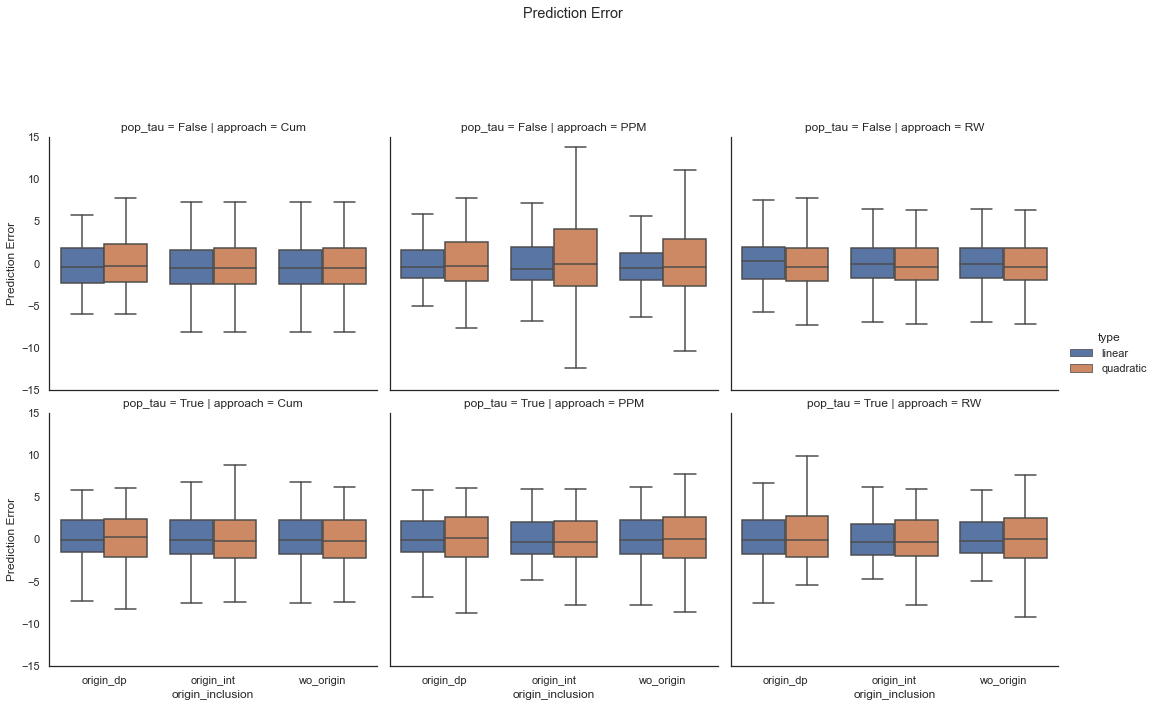

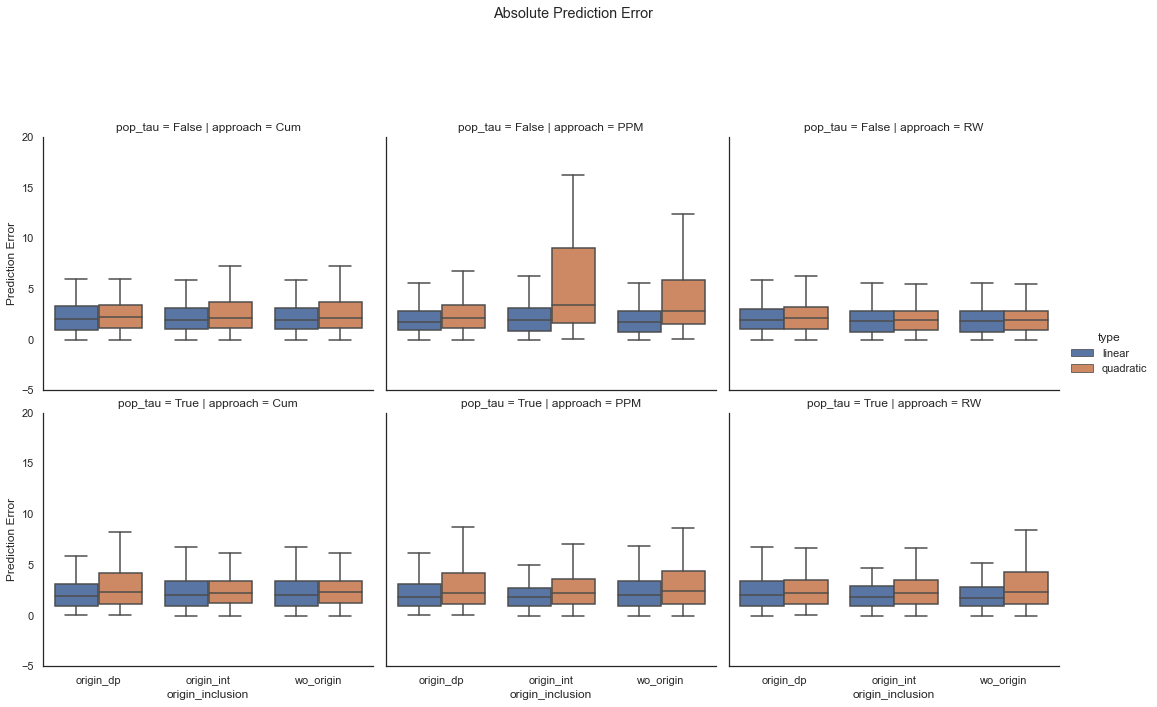

In [41]:
%%time
prediction_error()

Wall time: 27.7 s


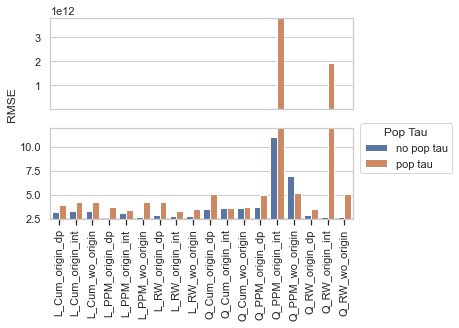

In [ ]:
# Can benefit SOC
from sklearn.metrics import mean_squared_error
RMSE()

In [ ]:
from Profile_Generation import *
from plotting import *

df = read_file_and_remove_unprocessed_pop_tau()

In [ ]:
origin_df = df.copy()

# False negative/positive

dat = origin_df[['patient', 'method', 'prediction', 'response']]

# Create boolean, true when model predict wrong range
for i in range(len(dat)):
    # All False
    dat.loc[i, 'wrong_range'] = False
    # Unless condition 1: prediction within range, response outside range
    if (dat.loc[i, 'prediction'] >= 8) and (dat.loc[i, 'prediction'] <= 10):
        if (dat.loc[i, 'response'] > 10) or (dat.loc[i, 'response'] < 8):
            dat.loc[i, 'wrong_range'] = True
    # Unless condition 2: prediction outside range, response within range
    elif (dat.loc[i, 'prediction'] > 10) or (dat.loc[i, 'prediction'] < 8):
        if (dat.loc[i, 'response'] >= 8) and (dat.loc[i, 'response'] <= 10):
            dat.loc[i, 'wrong_range'] = True

dat = dat.groupby('method')['wrong_range'].apply(lambda x: x.sum() / x.count() * 100).reset_index()
dat['source'] = 'CURATE'

# Create another dataframe
dat_physician = origin_df[['patient', 'method', 'prediction', 'response']]
dat_physician = dat_physician[(dat_physician['method']=='L_Cum_wo_origin') | (dat_physician['method']=='Q_Cum_wo_origin')]
dat_physician = dat_physician.reset_index(drop=True)

# Create boolean, true if response is outside range
for i in range(len(dat_physician)):
    # Set boolean default as false
    dat_physician.loc[i, 'wrong_range'] = False
    # Create boolean as True if outside range
    if (dat_physician.loc[i, 'response'] > 10) or (dat_physician.loc[i, 'response'] < 8):
        dat_physician.loc[i, 'wrong_range'] = True

dat_physician = dat_physician.groupby('method')['wrong_range'].apply(lambda x: x.sum() / x.count() * 100).reset_index()
dat_physician['source'] = 'SOC'

# Create dataframe with 2 stacked dataframes of dat_physician with pop tau column for both
# pop tau and no pop tau
dat_physician_1 = dat_physician.copy()
dat_physician_1['pop_tau'] = 'pop tau'
dat_physician_2 = dat_physician.copy()
dat_physician_2['pop_tau'] = 'no pop tau'
dat_SOC = pd.concat([dat_physician_1, dat_physician_2]).reset_index(drop=True)

# Rename methods to linear and quadratic only
for i in range(len(dat_SOC)):
    if 'L_' in dat_SOC.method[i]:
        dat_SOC.loc[i, 'method'] = 'L_SOC'
    else:
        dat_SOC.loc[i, 'method'] = 'Q_SOC'

# Create pop tau column and rename methods without 'pop_tau'
dat['pop_tau'] = ""
for i in range(len(dat)):
    if 'pop_tau' in dat.method[i]:
        dat.loc[i, 'pop_tau'] = 'pop tau'
        dat.loc[i, 'method'] = dat.method[i][:-8]
    else:
        dat.loc[i, 'pop_tau'] = 'no pop tau'
        dat.loc[i, 'method'] = dat.method[i]

combined_df = pd.concat([dat, dat_SOC]).reset_index()

# # Boxplot
# # sns.set(font_scale=2, rc={'figure.figsize':(15,10)})
# sns.set_theme(font_scale=2)
# sns.set_style('whitegrid')
# ax = sns.boxplot(data=dat, x='method', y='wrong_range', hue='source', dodge=False)
# ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)
# ax.set_xlabel(None)
# ax.set_ylabel('Wrong Range Predicted (%)')
# ax.set_title('Wrong Range Predicted  (%)')
# plt.legend(loc='upper right', bbox_to_anchor=(1.25,1))

# Barplot
sns.set(font_scale=1.4, rc={'figure.figsize':(5,40)})
sns.set_style('whitegrid')

g = sns.catplot(data=combined_df, x='method', y='wrong_range', col='pop_tau',
           kind='bar', hue='source', dodge=False)
g.set(ylabel='No. of False Positive/\nFalse Negative Predictions (%)',
     xlabel=None)
g.set_xticklabels(rotation=90)
# plt.ylabels('No. of False Positive/False Negative Predictions (%)')
# plt.xticks(rotation=90)

plt.savefig('false_pos_neg.png', dpi=300, bbox_inches='tight')

In [ ]:
df = pd.read_excel('GOOD OUTPUT DATA\output (with pop tau by LOOCV).xlsx', sheet_name='result')

In [ ]:
dat = df.copy()
# Keep all methods in dataframe except strictly tau methods (contains 'tau' but does not contain 'pop')
method_list = dat.method.unique().tolist()
exclude_method_list = [x for x in method_list if (('tau' in x) and ('pop' not in x))]
method_list = [x for x in method_list if x not in exclude_method_list]
dat = dat[dat.method.isin(method_list)]
dat = dat.reset_index(drop=True)

num_pred_linear = dat[dat.method=='L_Cum_wo_origin'].prediction.count()
num_pred_quad = dat[dat.method=='Q_Cum_wo_origin'].prediction.count()

print(f'num_pred_linear {num_pred_linear} | num_pred_quad {num_pred_quad}')

In [ ]:
dat = df.copy()

# Keep all methods in dataframe except strictly tau methods (contains 'tau' but does not contain 'pop')
method_list = dat.method.unique().tolist()
exclude_method_list = [x for x in method_list if (('tau' in x) and ('pop' not in x))]
method_list = [x for x in method_list if x not in exclude_method_list]
dat = dat[dat.method.isin(method_list)]
dat = dat.reset_index(drop=True)

# Create column for cond_1 where both predicted and observed values are out-of-range
dat['cond_1'] = ((dat.prediction < 8) | (dat.prediction > 10)) & ((dat.response < 8) | (dat.response > 10))

# Create column for cond_2 where prediction error is between -3 and +1
dat['cond_2'] = (dat.deviation > -3) & (dat.deviation < 1)

# Interpolate for 8, 9, 10mg
for i in range(len(dat)):
    # Create function
    coeff = dat.loc[i, 'coeff_2x':'coeff_0x'].apply(float).to_numpy()
    coeff = coeff[~np.isnan(coeff)]
    p = np.poly1d(coeff)
    x = np.linspace(0, 9)
    y = p(x)
    order = y.argsort()
    y = y[order]
    x = x[order]

    dat.loc[i, 'interpolated_dose_8'] = np.interp(8, y, x).tolist()
    dat.loc[i, 'interpolated_dose_9'] = np.interp(9, y, x).tolist()
    dat.loc[i, 'interpolated_dose_10'] = np.interp(10, y, x).tolist()

# dat[['coeff_2x', 'coeff_1x', 'coeff_0x', 'interpolated_dose_8','interpolated_dose_9','interpolated_dose_10']].describe()
# dat[['prediction', 'response', 'deviation', 'cond_1', 'cond_2']]
# dat
'interpolated_dose_8'


In [ ]:
np.iscomplex(dat.interpolated_dose_10).sum()

In [ ]:
import numpy as np
a = 2.881250
b = -0.121875
# c = -16.252151

x = 3.513015
a*x + b

# a*np.square(x) + b*x + c


In [ ]:
dat = pd.read_excel('GOOD OUTPUT DATA\output (with pop tau by LOOCV).xlsx', sheet_name='result')

# Keep all methods in dataframe except strictly tau methods (contains 'tau' but does not contain 'pop')
method_list = dat.method.unique().tolist()
exclude_method_list = [x for x in method_list if (('tau' in x) and ('pop' not in x))]
method_list = [x for x in method_list if x not in exclude_method_list]
dat = dat[dat.method.isin(method_list)]
dat = dat.reset_index(drop=True)

# Find RMSE by method
def rmse(dat):
    rmse = mean_squared_error(dat.response, dat.prediction, squared=False)
    return pd.Series(dict(rmse=rmse))

dat = dat.groupby('method').apply(rmse).reset_index()

# Create pop tau column and remove 'pop_tau' from method name
dat['pop_tau'] = ""
dat['OG_method'] = ""
for i in range(len(dat)):
    if 'pop_tau' in dat.method[i]:
        dat.loc[i, 'pop_tau'] = 'pop tau'
        dat.loc[i, 'OG_method'] = dat.loc[i, 'method'][:-8]
    else: 
        dat.loc[i, 'pop_tau'] = 'no pop tau'
        dat.loc[i, 'OG_method'] = dat.loc[i, 'method']

# Line plot of RMSE for pop tau and non pop tau
plt.figure(figsize=(15,10))
f, (ax, ax2) = plt.subplots(2, 1, sharex=True)

# sns.lineplot(data=dat, x='OG_method', y='rmse', hue='pop_tau', marker='o', ax=ax)
# sns.lineplot(data=dat, x='OG_method', y='rmse', hue='pop_tau', marker='o', ax=ax2)

ax = sns.catplot(data=dat, x='OG_method', y='rmse', hue='pop_tau', ax=ax, kind='bar')
ax2 = sns.catplot(data=dat, x='OG_method', y='rmse', hue='pop_tau', ax=ax2, kind='bar')

ax2.set_ylim([min(dat.rmse), 12])
ax.set_ylim([np.exp(12), max(dat.rmse)+np.exp(12)])

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
# ax.spines['top'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax.xaxis.tick_top()
ax.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

ax.set_ylabel(None)
ax2.set_ylabel('RMSE', loc='top')
ax2.set_xlabel(None)
ax2.get_legend().remove()
plt.xticks(rotation=90)

# Save
plt.savefig('RMSE.png', bbox_inches='tight', dpi=300, facecolor='w')

In [ ]:
# How are the predictions different, between different half-lives, for each method compared to without tau?
# Plot prediction vs prediction day, for each patient, colored by tau with different half-lives vs non-tau

dat = result_df.copy()
dat = dat[['prediction', 'pred_day', 'half_life', 'method', 'patient', 'deviation']]
patient_list = dat.patient.unique()
method_list = dat.method.unique()
dat = dat[dat.patient == patient_list[6]]
dat.half_life = dat.half_life.fillna(0)
# L_Cum_origin_dp_tau
palette = sns.color_palette("rocket_r", n_colors=len(dat.half_life.unique()))
# a = np.arange(3.5, 41.5, 1)
# dat.half_life.unique()
sns.lineplot(data=dat[dat.method.str.contains("L_RW_origin_dp")], 
             x="pred_day", y="deviation", hue="half_life", 
             palette=palette, ci=None)
plt.legend(bbox_to_anchor=(1.25,1), loc='upper right')
# plt.plot(data=dat[dat.method == "L_Cum_origin_dp_tau"], 
#          x="pred_day", y="prediction", color="half_life".map())

In [ ]:
dat = result_df.copy()
dat = dat[['deviation', 'method', 'patient', 'pred_day', 'response', 'prediction', 'half_life']]
dat['half_life'] = dat['half_life'].fillna('')
dat = dat.loc[(dat.method == 'Q_Cum_origin_dp_tau') | (dat.method == 'Q_Cum_origin_dp')]
dat['new_method'] = ""
for i in range(len(dat)):
    dat['new_method'].iloc[i] = dat['method'].iloc[i] + '_' + str(dat['half_life'].iloc[i])
    # print(dat['method'].iloc[i])
plot = sns.lineplot(data=dat, x="patient", y="deviation", hue="new_method", ci=None, legend=False)
plot = sns.lineplot(data=dat.loc[dat.method=='Q_Cum_origin_dp_ '], x="patient", y="deviation", color='b', ci=None, legend=False)
# dat.head()

# sns.lineplot(data=dat.loc[dat.patient==84], x="pred_day", y="deviation", hue="method")

# dat

In [ ]:
# Plotting
# perc_days_within_target_tac(result_df)
# perc_days_outside_target_tac(result_df)
# median_perc_within_acc_dev(result_df)
# can_benefit(result_df)
# modified_TTR(result_df)
# wrong_range(result_df)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import math

d = {'dose': [0.5, 1, 1.5, 1.5, 3, 3], 'response': [2.4, 2.8, 3.2, 3.1, 7.9, 10]}
df = pd.DataFrame(data=d)

# Calculate weight
j = 0
decay_weight = []
for i in range(len(df)):
    decay_weight.append(math.exp(-(24*(i))/(12/np.log(2))))

# Fit model
poly_reg = PolynomialFeatures(degree=2)
X = np.array(df.dose).reshape(-1, 1)
y = np.array(df.response)
X = poly_reg.fit_transform(X)
result = LinearRegression(fit_intercept=False).fit(X, y, decay_weight)
result.coef_
# new = 3
# prediction = result.predict(poly_reg.fit_transform([[new]]))[0]
# prediction

In [ ]:
np.array(3).reshape(-1, 1)

In [ ]:
a = pd.DataFrame(columns=['col1','col2'])
a = a[0:0]
a.loc[2, :] = [1, 2]

b = pd.DataFrame(columns=['col1','col2'])
b = b[0:0]
b.loc[0, :] = [1, 2]
b.loc[1, :] = [1, 2]

pd.concat([a, b])

In [ ]:
hello = ""
if hello:
    print('not empty')
else: print('empty')

In [ ]:
cols = ['a','b']
list_of_series = [pd.Series([1,2],index=cols), pd.Series([3,4],index=cols)]
df = pd.DataFrame(list_of_series, columns=cols)
df = pd.DataFrame(columns=cols)
df